# Importing Libraries

In [1]:
#  pip install plotly --upgrade

In [2]:
import pandas as pd   #for the manipulating the data
import matplotlib.pyplot as plt   #we import this for the better visualtization
import plotly.express as px   #we import this lib also for the better visualtization of the data

from plotly.graph_objs import Figure, Bar, Scatter3d,Pie
from sklearn.preprocessing import LabelEncoder, StandardScaler

# we import this libraries for the regressor models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
import numpy as np

# now after that we import this lib for the predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from math import sqrt

# now after that we import this for the splitting of the data
from sklearn.model_selection import train_test_split



## Reading Data

In [3]:
# now after that we read our data
dt= pd.read_excel('/content/drive/MyDrive/Tanishq/FestMan Ecommerce Data Challenge (1) (3).xlsx')

# Data Analysis

In [39]:
# now we are checking the first seven rows of our data
dt.head(7)

,OrderDate,OrderID,Delivery Date,CustomerID,Customer Age,Customer Gender,Location,Zone,Delivery Type,Product Category,...,Product,Unit Price,Shipping Fee,Order Quantity,Sale Price,Status,Reason,Rating,Month,Total Sales
0,2020-05-31,5136486,2020-06-04,230569424,1.912597,1,24,2,0,1,...,Fashion Girl's Dress Kids Children Newborn Bab...,-0.217434,-0.288987,-1.140358,-0.217434,1,2,2,June,250.0
1,2020-05-31,5136457,2020-06-12,230568182,-1.081460,0,24,2,2,2,...,Blood Pressure Monitor Digital Wrist BP Pulse ...,-0.295537,-1.444599,0.569419,-0.295537,1,3,2,June,442.4
2,2020-05-31,5136465,2020-06-10,230567584,-0.446357,1,23,1,2,2,...,Portable Blood Pressure Monitor - White,-0.246501,-1.059395,1.595286,-0.246501,0,5,3,June,1020.0
3,2020-05-31,5136488,2020-06-05,230563788,2.366242,0,11,0,0,4,...,Samsung A3 Core Dual SIM - 16GB HDD - 1GB RAM ...,0.113685,-0.866793,0.569419,0.113685,0,5,1,June,2709.0
4,2020-05-31,5136449,2020-06-10,230563726,-1.625834,0,23,1,1,1,...,Boys Sneakers Casual Kids Sports Shoes-Gold,-0.223753,0.096217,1.253330,-0.223753,0,5,3,June,1080.0


In [38]:
#Now after that we are checking the sahpe of our dataset
dt.shape

(113000, 21)

In [40]:
# Now after that we are checking the information of our dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113000 entries, 0 to 112999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   OrderDate         113000 non-null  datetime64[ns]
 1   OrderID           113000 non-null  int64         
 2   Delivery Date     113000 non-null  datetime64[ns]
 3   CustomerID        113000 non-null  int64         
 4   Customer Age      113000 non-null  float64       
 5   Customer Gender   113000 non-null  int64         
 6   Location          113000 non-null  int64         
 7   Zone              113000 non-null  int64         
 8   Delivery Type     113000 non-null  int64         
 9   Product Category  113000 non-null  int64         
 10  SubCategory       113000 non-null  int64         
 11  Product           113000 non-null  object        
 12  Unit Price        113000 non-null  float64       
 13  Shipping Fee      113000 non-null  float64       
 14  Orde

In [6]:
# Now we are checking the null values in our data
dt.isnull().sum()

OrderDate               0
OrderID                 0
Delivery Date           0
CustomerID              0
Customer Age            0
Customer Gender         0
Location                0
Zone                    0
Delivery Type           0
Product Category        0
SubCategory             0
Product                 0
Unit Price              0
Shipping Fee            0
Order Quantity          0
Sale Price              0
Status                  0
Reason              83355
Rating                  0
dtype: int64

In [41]:
#now after that we are checking the mean, sd, and other details of our data
dt.describe()

,OrderID,CustomerID,Customer Age,Customer Gender,Location,Zone,Delivery Type,Product Category,SubCategory,Unit Price,Shipping Fee,Order Quantity,Sale Price,Status,Reason,Rating,Total Sales
count,1.130000e+05,1.130000e+05,1.130000e+05,113000.000000,113000.000000,113000.000000,113000.000000,113000.000000,113000.000000,1.130000e+05,1.130000e+05,1.130000e+05,1.130000e+05,113000.000000,113000.000000,113000.000000,113000.000000
mean,5.079973e+06,2.305156e+08,8.601969e-17,0.515814,14.321071,1.446044,1.004735,1.977257,7.749531,-6.967092e-17,7.294067e-18,6.328861e-17,-6.967092e-17,0.270142,4.215204,2.729929,937.575922
std,3.263155e+04,3.262048e+04,1.000004e+00,0.499752,8.234509,1.008425,0.815476,1.196392,4.666960,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.444035,1.503120,1.355434,1447.964942
min,5.023455e+06,2.304591e+08,-1.716563e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.564530e-01,-1.637201e+00,-1.482314e+00,-3.564530e-01,0.000000,0.000000,1.000000,15.000000
25%,5.051716e+06,2.304874e+08,-7.185440e-01,0.000000,11.000000,0.000000,0.000000,1.000000,4.000000,-3.311768e-01,-8.667927e-01,-7.984026e-01,-3.311768e-01,0.000000,4.000000,2.000000,153.000000
50%,5.079970e+06,2.305156e+08,-8.344097e-02,1.000000,13.000000,2.000000,1.000000,2.000000,8.000000,-2.806243e-01,9.621750e-02,-1.144915e-01,-2.806243e-01,0.000000,5.000000,3.000000,387.000000
75%,5.108233e+06,2.305439e+08,6.423910e-01,1.000000,23.000000,2.000000,2.000000,3.000000,11.000000,-1.782555e-01,8.666256e-01,9.113750e-01,-1.782555e-01,1.000000,5.000000,4.000000,900.000000
max,5.136490e+06,2.305721e+08,4.634467e+00,1.000000,25.000000,3.000000,2.000000,4.000000,15.000000,5.564507e+00,1.637034e+00,1.595286e+00,5.564507e+00,1.000000,5.000000,5.000000,8160.000000


# EDA

In [7]:
# Now after that  in this code firstly we are Extracting the month from the "OrderDate" column
dt["Month"] = pd.to_datetime(dt["OrderDate"]).dt.month_name()

# Now after that we are Groupping by month and count orders
order_counts = dt.groupby("Month")["OrderDate"].count().reset_index(name="Order Count")

# Now after that we are Creating the line chart with Plotly
fig = px.line(
    x=order_counts["Month"],
    y=order_counts["Order Count"],
    title="Month v/s No. of orders Placed",
)

# Now after that we are Customizing the chart (optional)
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Number of Orders",
    showlegend=False,
)

# Now after that finally we are Displaying the chart
fig.show()


In [8]:
# Now after that we checkng the values counts of product category
dt['Product Category'].value_counts()

Health and beauty    35953
Fashion              33388
Phones and Tablet    17978
Home and Office      15408
Electronics          10273
Name: Product Category, dtype: int64

In [9]:
# Now after that firstly in this code we are Pivoting the data for easier plotting
pivoted_df = dt.pivot_table(
    values="Customer Age",
    index="Product Category",
    columns="Customer Gender",
    aggfunc="count",
    fill_value=0,  # Now after that we are Filling missing values with 0 for proper stacking
)

# Now after that we are Extracting data for the graph
product_categories = list(pivoted_df.index)
male_counts = pivoted_df["M"].tolist()
female_counts = pivoted_df["F"].tolist()

# Now after that we are Creating a Plotly figure
fig = Figure()

# Now after that we are Adding bars for males
fig.add_trace(
    Bar(
        x=product_categories,
        y=male_counts,
        name="Male",
        base=0,
        opacity=0.7,
        marker_color="blue",  # Now after that we are Setting male bar color
    )
)

# Now after that we are Adding bars for females on top of males (stacked)
fig.add_trace(
    Bar(
        x=product_categories,
        y=female_counts,
        name="Female",
        base=male_counts,
        opacity=0.7,
        marker_color="pink",  # Now after that we are Setting female bar color
    )
)

# Now after that we are Configuring graph layout
fig.update_layout(
    title="A Comparative Analysis of Product Category Preferences Across Different Age Groups and Genders",
    xaxis_title="Product Category",
    yaxis_title="Number of Orders",
    yaxis_range=[0, pivoted_df.sum(axis=1).max() + 10],  # Now after that we are Adjust y-axis range for better visibility
    xaxis_tickangle=45,
    legend_title="Gender",
    barmode="stack",
)

# Now after that finally we are Showing the graph
fig.show()

In [10]:
# Now after that Firstly in this shell we are Groupping data by Location and Delivery Type, counting occurrences
grouped_data = dt.groupby(["Location", "Delivery Type"])["Delivery Type"].count().unstack()

# Now after that we are Extracting data for the graph
locations = list(grouped_data.index)
delivery_types = list(grouped_data.columns)
counts_by_type = grouped_data.values.T.tolist()  # Now after that we are Transposing data for easier plotting

# Now after that we are Creating a Plotly figure
fig = Figure()

# Now after that we are Adding bar traces for each delivery type
for i, delivery_type in enumerate(delivery_types):
    fig.add_trace(
        Bar(
            x=locations,
            y=counts_by_type[i],
            name=delivery_type,
            opacity=0.7,
        )
    )

# Now after that we are Configuring the layout
fig.update_layout(
    title="Delivery Type Popularity by the Location",
    xaxis_title="Location",
    yaxis_title="Number of Deliveries",
    xaxis_tickangle=45,
    legend_title="Delivery Type",
    barmode="group",  # Now after that we are Groupping bars by location for better comparison
)


# Now after that finally we are Showing the graph
fig.show()


In [11]:
#now we are Adding the new column
dt["Total Sales"] = dt["Order Quantity"] * dt["Sale Price"]

#now after the we are checking the head To confirm the new column is added
dt.head()


,OrderDate,OrderID,Delivery Date,CustomerID,Customer Age,Customer Gender,Location,Zone,Delivery Type,Product Category,...,Product,Unit Price,Shipping Fee,Order Quantity,Sale Price,Status,Reason,Rating,Month,Total Sales
0,2020-05-31,5136486,2020-06-04,230569424,57,M,Western,Zone 3,Express,Fashion,...,Fashion Girl's Dress Kids Children Newborn Bab...,125.0,10,2,125.0,Returned,Onsite -Description mismatch,2,May,250.0
1,2020-05-31,5136457,2020-06-12,230568182,24,F,Western,Zone 3,Standard Delivery,Health and beauty,...,Blood Pressure Monitor Digital Wrist BP Pulse ...,63.2,4,7,63.2,Returned,Product - Not fitting expectation,2,May,442.4
2,2020-05-31,5136465,2020-06-10,230567584,31,M,Weija,Zone 2,Standard Delivery,Health and beauty,...,Portable Blood Pressure Monitor - White,102.0,6,10,102.0,Delivered,NaN,3,May,1020.0
3,2020-05-31,5136488,2020-06-05,230563788,62,F,Greater Accra,Zone 1,Express,Phones and Tablet,...,Samsung A3 Core Dual SIM - 16GB HDD - 1GB RAM ...,387.0,7,7,387.0,Delivered,NaN,1,May,2709.0
4,2020-05-31,5136449,2020-06-10,230563726,18,F,Weija,Zone 2,Shipped from Abroad,Fashion,...,Boys Sneakers Casual Kids Sports Shoes-Gold,120.0,12,9,120.0,Delivered,NaN,3,May,1080.0


In [12]:
#Now after that in this code firstly we are Calculating total sales by category
total_sales_by_category = dt.groupby("Product Category")["Total Sales"].sum().reset_index()

#Now after that we are Defining labels and values for the pie chart
labels = total_sales_by_category["Product Category"]
values = total_sales_by_category["Total Sales"]

#Now after that we are Creating a Plotly figure
fig = Figure()

#Now after that we are Adding the pie chart trace
fig.add_trace(
    Pie(labels=labels, values=values, title="Total Sales by Product Category")
)

#Now after that we are Configuring the layout
fig.update_layout(
    title='''Total Sales = Order Quantity * Sale Price
        Distribution of Total Sales Across Product Categories''',
    showlegend=True,
    legend_title="Product Category",
)


#Now after that lastly we are Showing the plot
fig.show()


In [13]:
# Now we are checking the values of our status column form our data
dt["Status"].value_counts()

Delivered    82474
Returned     30526
Name: Status, dtype: int64

In [14]:
# Now after that in this shell we are Extracting month from Delivery Date
dt["Month"] = pd.to_datetime(dt["Delivery Date"]).dt.month_name()

# Now after that we are Counting deliveries by month and status
delivery_counts = dt.groupby(["Month", "Status"]).size().unstack().fillna(0)

# Now after that we are Defining colors for different delivery statuses
status_colors = {"Delivered": "lime green", "Returned": "red"}

# Now after that we are Creating a Plotly figure
fig = Figure()

# Now after that we are Adding bar traces for each status
for status, count_data in delivery_counts.items():
    fig.add_trace(
        Bar(
            x=delivery_counts.index,
            y=count_data,
            name=status,
            opacity=0.7,
            marker_color=status_colors[status],
        )
    )

# Now after that we are Configuring layout options
fig.update_layout(
    title="Temporal Analysis of Delivery Outcomes: Monthly Distribution of Delivery Status",
    xaxis_title="Month",
    yaxis_title="Number of Deliveries",
    barmode="group",  # Now after that we are Groupping bars by month for comparison
    legend_title="Delivery Status",
)


# Now after that finally we are Showing the plot
fig.show()


In [15]:
#Now we are Label Encoding the variables form our dataset
categorical_features = ['Customer Gender', 'Location', 'Zone', 'Delivery Type', 'Product Category', 'SubCategory', 'Status', 'Reason']
le = LabelEncoder()
for col in categorical_features:
    dt[col] = le.fit_transform(dt[col])

# Standardization the columns from our data
numerical_features = ['Customer Age', 'Unit Price', 'Shipping Fee', 'Order Quantity', 'Sale Price']
scaler = StandardScaler()
dt[numerical_features] = scaler.fit_transform(dt[numerical_features])

#now checking the head
dt.head()


,OrderDate,OrderID,Delivery Date,CustomerID,Customer Age,Customer Gender,Location,Zone,Delivery Type,Product Category,...,Product,Unit Price,Shipping Fee,Order Quantity,Sale Price,Status,Reason,Rating,Month,Total Sales
0,2020-05-31,5136486,2020-06-04,230569424,1.912597,1,24,2,0,1,...,Fashion Girl's Dress Kids Children Newborn Bab...,-0.217434,-0.288987,-1.140358,-0.217434,1,2,2,June,250.0
1,2020-05-31,5136457,2020-06-12,230568182,-1.081460,0,24,2,2,2,...,Blood Pressure Monitor Digital Wrist BP Pulse ...,-0.295537,-1.444599,0.569419,-0.295537,1,3,2,June,442.4
2,2020-05-31,5136465,2020-06-10,230567584,-0.446357,1,23,1,2,2,...,Portable Blood Pressure Monitor - White,-0.246501,-1.059395,1.595286,-0.246501,0,5,3,June,1020.0
3,2020-05-31,5136488,2020-06-05,230563788,2.366242,0,11,0,0,4,...,Samsung A3 Core Dual SIM - 16GB HDD - 1GB RAM ...,0.113685,-0.866793,0.569419,0.113685,0,5,1,June,2709.0
4,2020-05-31,5136449,2020-06-10,230563726,-1.625834,0,23,1,1,1,...,Boys Sneakers Casual Kids Sports Shoes-Gold,-0.223753,0.096217,1.253330,-0.223753,0,5,3,June,1080.0


## Dropping Unnecessary Columns

In [16]:
# Now we are Dropping the specified columns
columns_to_drop = [
    "OrderDate",
    "OrderID",
    "Delivery Date",
    "CustomerID",
    "Location",
    "Zone",
    "SubCategory",
    "Product",
    "Reason",
    "Month",
] #Unnecessary columns

df_filtered = dt.drop(columns_to_drop, axis=1)


In [17]:
df_filtered

,Customer Age,Customer Gender,Delivery Type,Product Category,Unit Price,Shipping Fee,Order Quantity,Sale Price,Status,Rating,Total Sales
0,1.912597,1,0,1,-0.217434,-0.288987,-1.140358,-0.217434,1,2,250.0
1,-1.081460,0,2,2,-0.295537,-1.444599,0.569419,-0.295537,1,2,442.4
2,-0.446357,1,2,2,-0.246501,-1.059395,1.595286,-0.246501,0,3,1020.0
3,2.366242,0,0,4,0.113685,-0.866793,0.569419,0.113685,0,1,2709.0
4,-1.625834,0,1,1,-0.223753,0.096217,1.253330,-0.223753,0,3,1080.0
...,...,...,...,...,...,...,...,...,...,...,...
112995,1.096036,1,1,3,-0.249029,0.288820,-1.482314,-0.249029,0,5,100.0
112996,1.458952,1,1,2,-0.322330,-0.866793,0.911375,-0.322330,0,4,336.0
112997,0.007288,0,1,2,-0.331177,-0.288987,1.253330,-0.331177,0,4,315.0
112998,-1.081460,0,0,1,-0.178255,-0.866793,-1.482314,-0.178255,0,2,156.0


### Splittig Traget Column

In [18]:
X = df_filtered.drop('Total Sales', axis=1)
y = df_filtered['Total Sales']

In [19]:
X

,Customer Age,Customer Gender,Delivery Type,Product Category,Unit Price,Shipping Fee,Order Quantity,Sale Price,Status,Rating
0,1.912597,1,0,1,-0.217434,-0.288987,-1.140358,-0.217434,1,2
1,-1.081460,0,2,2,-0.295537,-1.444599,0.569419,-0.295537,1,2
2,-0.446357,1,2,2,-0.246501,-1.059395,1.595286,-0.246501,0,3
3,2.366242,0,0,4,0.113685,-0.866793,0.569419,0.113685,0,1
4,-1.625834,0,1,1,-0.223753,0.096217,1.253330,-0.223753,0,3
...,...,...,...,...,...,...,...,...,...,...
112995,1.096036,1,1,3,-0.249029,0.288820,-1.482314,-0.249029,0,5
112996,1.458952,1,1,2,-0.322330,-0.866793,0.911375,-0.322330,0,4
112997,0.007288,0,1,2,-0.331177,-0.288987,1.253330,-0.331177,0,4
112998,-1.081460,0,0,1,-0.178255,-0.866793,-1.482314,-0.178255,0,2


In [20]:
y

0          250.0
1          442.4
2         1020.0
3         2709.0
4         1080.0
           ...  
112995     100.0
112996     336.0
112997     315.0
112998     156.0
112999     560.0
Name: Total Sales, Length: 113000, dtype: float64

## Data Splitting

In [21]:
X_ecom_train, X_ecom_test, y_ecom_train, y_ecom_test = train_test_split(X, y, test_size=0.25, random_state=42)

in the above code of ours we are splitting our dataset in the ratio of 75:25 that is we are using 75% percent data for training and we are using 25% data for the testing
we set the random state to 42

# Models

## Random Forest

In [22]:
rf_model = RandomForestRegressor(max_depth=5, min_samples_split=3, n_estimators=25, random_state=30)
rf_model.fit(X_ecom_train, y_ecom_train)


# Now Afer that we are Predicting on training data
rf_y_ecom_train_pred = rf_model.predict(X_ecom_train)

# Now Afer that we are Calculating metrics on training data
# Now Afer that we are Calculating mean squared error between the actual and predicted values for training data
rf_train_mse = mean_squared_error(y_ecom_train, rf_y_ecom_train_pred)

# Now Afer that we are Calculating R-squared (coefficient of determination) between the actual and predicted values for training data
rf_train_r2 = r2_score(y_ecom_train, rf_y_ecom_train_pred)

# Now Afer that we are Calculating mean absolute error between the actual and predicted values for training data
rf_train_mae = mean_absolute_error(y_ecom_train, rf_y_ecom_train_pred)

# Now Afer that we are Calculating root mean squared error between the actual and predicted values for training data
rf_train_rmse = sqrt(rf_train_mse)

#Now after the finally we are printing our report
print(f"Random Forest Training Results: \nMSE: {rf_train_mse}, \nR^2: {rf_train_r2}, \nMAE: {rf_train_mae},\nRMSE: {rf_train_rmse}")

Random Forest Training Results: 
MSE: 41908.2034831475, 
R^2: 0.9799934507851823, 
MAE: 105.84771791059818,
RMSE: 204.71493224273482


In [23]:
# Now after that we are Using the trained Random Forest model to make predictions on the test data
rf_y_pred = rf_model.predict(X_ecom_test)

# Now after that we are Calculating mean squared error between the actual and predicted values for testing data
rf_mse = mean_squared_error(y_ecom_test, rf_y_pred)

# Now after that we are Calculating R-squared (coefficient of determination) between the actual and predicted values for testing data
rf_r2 = r2_score(y_ecom_test, rf_y_pred)

# Now after that we are Calculating mean absolute error between the actual and predicted values for testing data
rf_mae = mean_absolute_error(y_ecom_test, rf_y_pred)

# Now after that we are Calculating root mean squared error between the actual and predicted values for testing data
rf_rmse = sqrt(rf_mse)

# Now after that finally we are Displaying the Random Forest model's performance metrics on the testing data
print(f"Random Forest Testing Results: \nMSE: {rf_mse}, \nR^2: {rf_r2}, \nMAE: {rf_mae},\nRMSE: {rf_rmse}")


Random Forest Testing Results: 
MSE: 43215.20837659334, 
R^2: 0.9794424277910764, 
MAE: 106.98186847736778,
RMSE: 207.8826793568751


## AdaBoost

In [24]:
#Now in this code firstly we are Initializing an AdaBoostRegressor model with specified parameters
dt_model = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, random_state=0)

# Now after that we are Training the AdaBoostRegressor model on the training data
dt_model.fit(X_ecom_train, y_ecom_train)

# Now after that we are Predicting on the training data using the trained AdaBoostRegressor model
dt_y_ecom_train_pred = dt_model.predict(X_ecom_train)

# Now after that we are Calculating performance metrics on the training data
dt_train_mse = mean_squared_error(y_ecom_train, dt_y_ecom_train_pred)

dt_train_r2 = r2_score(y_ecom_train, dt_y_ecom_train_pred)

dt_train_mae = mean_absolute_error(y_ecom_train, dt_y_ecom_train_pred)

dt_train_rmse = sqrt(dt_train_mse)

# Now after that finally we are Displaying the AdaBoostRegressor model's performance metrics on the training data
print(f"AdaBoost Training Results: \nMSE: {dt_train_mse}, \nR^2: {dt_train_r2}, \nMAE: {dt_train_mae},\nRMSE: {dt_train_rmse}")

AdaBoost Training Results: 
MSE: 130495.13597803873, 
R^2: 0.937702952089349, 
MAE: 276.87808190338063,
RMSE: 361.24110505040636


In [25]:
# Now after that we are Using the trained AdaBoostRegressor model to make predictions on the test data
dt_y_pred = dt_model.predict(X_ecom_test)

# Now after that we are Calculating mean squared error between the actual and predicted values for testing data
dt_mse = mean_squared_error(y_ecom_test, dt_y_pred)

# Now after that we are Calculating R-squared (coefficient of determination) between the actual and predicted values for testing data
dt_r2 = r2_score(y_ecom_test, dt_y_pred)

# Now after that we are Calculating mean absolute error between the actual and predicted values for testing data
dt_mae = mean_absolute_error(y_ecom_test, dt_y_pred)

# Now after that we are Calculating root mean squared error between the actual and predicted values for testing data
dt_rmse = sqrt(dt_mse)

# Now after that we are Displaying the AdaBoostRegressor model's performance metrics on the testing data
print(f"AdaBoost Testing Results: \nMSE: {dt_mse}, \nR^2: {dt_r2}, \nMAE: {dt_mae}, \nRMSE: {dt_rmse}")


AdaBoost Testing Results: 
MSE: 132033.68474982257, 
R^2: 0.9371912780195021, 
MAE: 278.36129352504946, 
RMSE: 363.3643966458775


## XGBoost

In [26]:
#Now after that in this code we are Initializing an XGBoostRegressor model with specified parameters
xgb_model = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=25,
    max_depth=5,
    min_child_weight=5,
    learning_rate=0.05,
    random_state=42,
)

#Now after that we are Training the XGBoostRegressor model on the training data
xgb_model.fit(X_ecom_train, y_ecom_train)

#Now after that we are Predicting on the training data using the trained XGBoostRegressor model
xgb_y_ecom_train_pred = xgb_model.predict(X_ecom_train)

#Now after that we are Calculating performance metrics on the training data
xgb_train_mse = mean_squared_error(y_ecom_train, xgb_y_ecom_train_pred)
xgb_train_r2 = r2_score(y_ecom_train, xgb_y_ecom_train_pred)
xgb_train_mae = mean_absolute_error(y_ecom_train, xgb_y_ecom_train_pred)
xgb_train_rmse = sqrt(xgb_train_mse)

#Now after that finally we are Displaying the XGBoostRegressor model's performance metrics on the training data
print(f"XGBoost Training Results: \nMSE: {xgb_train_mse}, \nR^2: {xgb_train_r2}, \nMAE: {xgb_train_mae},\nRMSE: {xgb_train_rmse}")

XGBoost Training Results: 
MSE: 181517.25197716663, 
R^2: 0.9133455139283174, 
MAE: 268.4201421236202,
RMSE: 426.0484150623807


In [42]:
# Now after that we are Using the trained XGBoostRegressor model to make predictions on the test data
xgb_y_pred = xgb_model.predict(X_ecom_test)

# Now after that we are Calculating mean squared error between the actual and predicted values for testing data
xgb_mse = mean_squared_error(y_ecom_test, xgb_y_pred)

# Now after that we are Calculating R-squared (coefficient of determination) between the actual and predicted values for testing data
xgb_r2 = r2_score(y_ecom_test, xgb_y_pred)

# Now after that we are Calculating mean absolute error between the actual and predicted values for testing data
xgb_mae = mean_absolute_error(y_ecom_test, xgb_y_pred)

# Now after that we are Calculating root mean squared error between the actual and predicted values for testing data
xgb_rmse = sqrt(xgb_mse)

# Now after that we are Displaying the XGBoostRegressor model's performance metrics on the testing data
print(f"XGBoost Testing Results: \nMSE: {xgb_mse}, \nR^2: {xgb_r2}, \nMAE: {xgb_mae},\nRMSE: {xgb_rmse}")


XGBoost Testing Results: 
MSE: 182479.87599718265, 
R^2: 0.9131939109306864, 
MAE: 278.36129352504946,
RMSE: 363.3643966458775


## Voting Ensemble

In [29]:
from sklearn.ensemble import VotingRegressor

# Now after that we are Defining the three base models
model1 = RandomForestRegressor(max_depth=5, min_samples_split=3, n_estimators=25, random_state=30)
model2 = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, random_state=0)
model3 = XGBRegressor(objective="reg:squarederror", n_estimators=25, max_depth=5, min_child_weight=5, learning_rate=0.05, random_state=42)

# Now after that we are Combining the models into an ensemble
ensemble = VotingRegressor(estimators=[('rf', model1), ('ada', model2), ('xgb', model3)])

# Now after that we are Fitting the ensemble model
ensemble.fit(X_ecom_train, y_ecom_train)

# Now after that we are Predictting on training data
ensemble_y_ecom_train_pred = ensemble.predict(X_ecom_train)

# Now after that we are Calculating metrics on training data
ensemble_train_mse = mean_squared_error(y_ecom_train, ensemble_y_ecom_train_pred)
ensemble_train_r2 = r2_score(y_ecom_train, ensemble_y_ecom_train_pred)
ensemble_train_mae = mean_absolute_error(y_ecom_train, ensemble_y_ecom_train_pred)
ensemble_train_rmse = sqrt(ensemble_train_mse)

# Now after that we are Printing the report
print(f"Voting Ensemble Training Results: \nMSE: {ensemble_train_mse}, \nR^2: {ensemble_train_r2}, \nMAE: {ensemble_train_mae},\nRMSE: {ensemble_train_rmse}")



Voting Ensemble Training Results: 
MSE: 70828.67884631614, 
R^2: 0.9661871106040332, 
MAE: 185.05172926666646,
RMSE: 266.1365793090385


In [43]:
# Now after that we are Using the trained ensemble model to make predictions on the test data
ensemble_y_pred = ensemble.predict(X_ecom_test)

# Now after that we are Calculating mean squared error between the actual and predicted values for testing data
ensemble_mse = mean_squared_error(y_ecom_test, ensemble_y_pred)

# Now after that we are Calculating R-squared (coefficient of determination) between the actual and predicted values for testing data
ensemble_r2 = r2_score(y_ecom_test, ensemble_y_pred)

# Now after that we are Calculating mean absolute error between the actual and predicted values for testing data
ensemble_mae = mean_absolute_error(y_ecom_test, ensemble_y_pred)

# Now after that we are Calculating root mean squared error between the actual and predicted values for testing data
ensemble_rmse = sqrt(ensemble_mse)

# Now after that finally we are Displaying the Voting Ensemble model's performance metrics on the testing data
print(f"Voting Ensemble Testing Results: \nMSE: {ensemble_mse}, \nR^2: {ensemble_r2}, \nMAE: {ensemble_mae},\nRMSE: {ensemble_rmse}")


Voting Ensemble Testing Results: 
MSE: 72153.27050631952, 
R^2: 0.9656765262909837, 
MAE: 186.65905659992026,
RMSE: 268.6136081927338


# Comparison Graphs

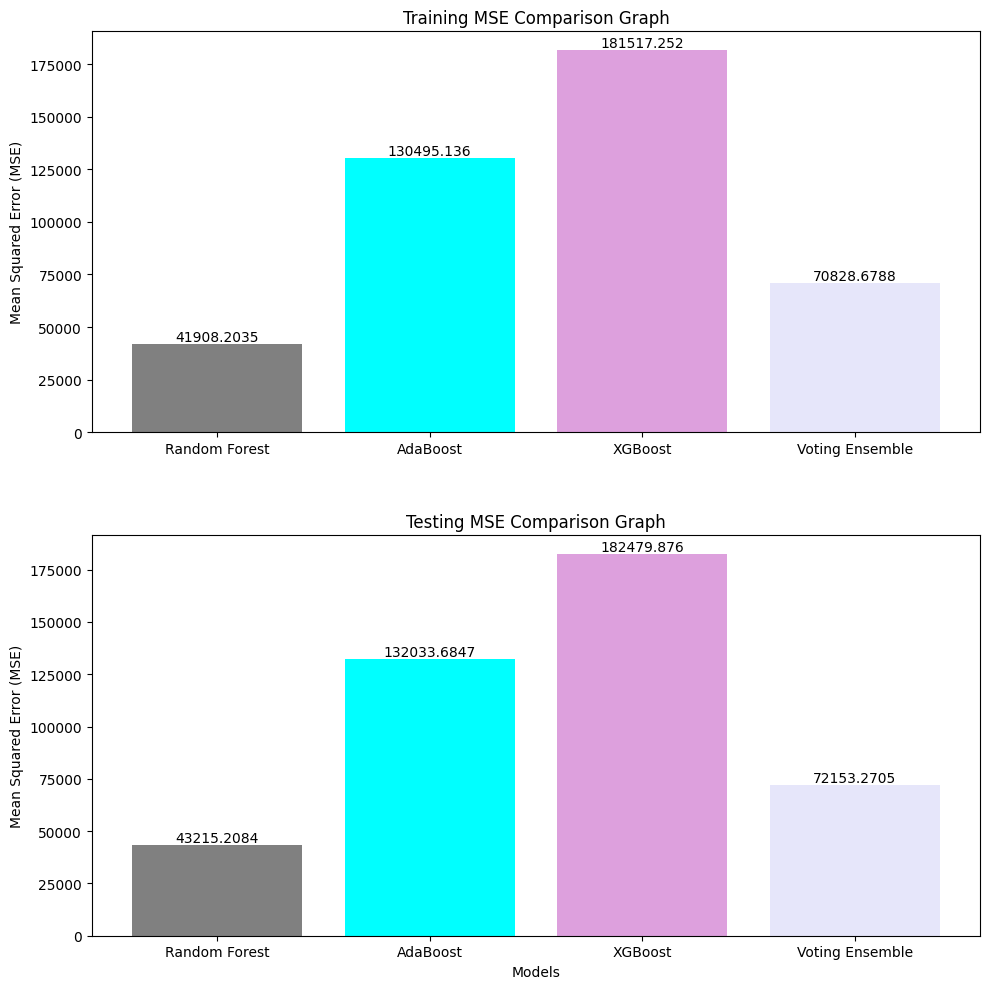

In [34]:
import matplotlib.pyplot as plt

train_mse_values = [rf_train_mse, dt_train_mse, xgb_train_mse, ensemble_train_mse]
test_mse_values = [rf_mse, dt_mse, xgb_mse, ensemble_mse]
models = ['Random Forest', 'AdaBoost', 'XGBoost', 'Voting Ensemble']

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotting the bar graph for training MSE
bars1 = axs[0].bar(models, train_mse_values, color=['grey', 'aqua', 'plum','lavender'])
axs[0].set_title('Training MSE Comparison Graph')
axs[0].set_ylabel('Mean Squared Error (MSE)')

# Adding the values on top of the bars
for bar in bars1:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

# Plotting the bar graph for testing MSE
bars2 = axs[1].bar(models, test_mse_values, color=['grey', 'aqua', 'plum','lavender'])
axs[1].set_title('\n\nTesting MSE Comparison Graph')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Mean Squared Error (MSE)')

# Adding the values on top of the bars
for bar in bars2:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

# Display the graph
plt.tight_layout()
plt.show()


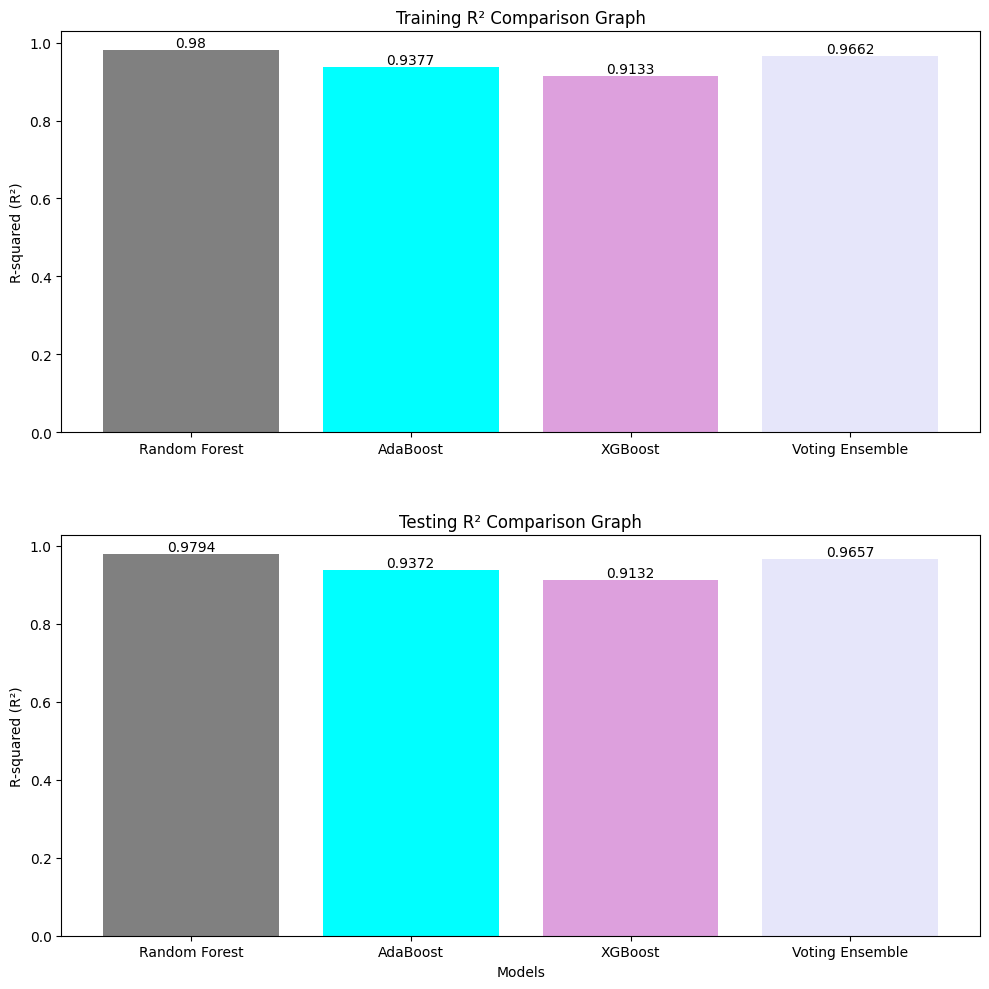

In [35]:
train_r2_values = [rf_train_r2, dt_train_r2, xgb_train_r2, ensemble_train_r2]
test_r2_values = [rf_r2, dt_r2, xgb_r2, ensemble_r2]
models = ['Random Forest', 'AdaBoost', 'XGBoost', 'Voting Ensemble']

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

#Now after that we are Plotting the bar graph for training R²
bars1 = axs[0].bar(models, train_r2_values, color=['grey', 'aqua', 'plum','lavender'])
axs[0].set_title('Training R² Comparison Graph')
axs[0].set_ylabel('R-squared (R²)')

#Now after that we are Adding the values on top of the bars in the first subplot (axs[0])
for bar in bars1:
    yval = bar.get_height()

    #Now after that we are Displaying the rounded y-value on top of the bar at the center
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')


#Now after that we are Plotting the bar graph for testing R²
bars2 = axs[1].bar(models, test_r2_values, color=['grey', 'aqua', 'plum','lavender'])
axs[1].set_title('\n\nTesting R² Comparison Graph')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('R-squared (R²)')

#Now after that we are Adding the values on top of the bars
for bar in bars2:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

#Now after that we are Display the graph
plt.tight_layout()
plt.show()


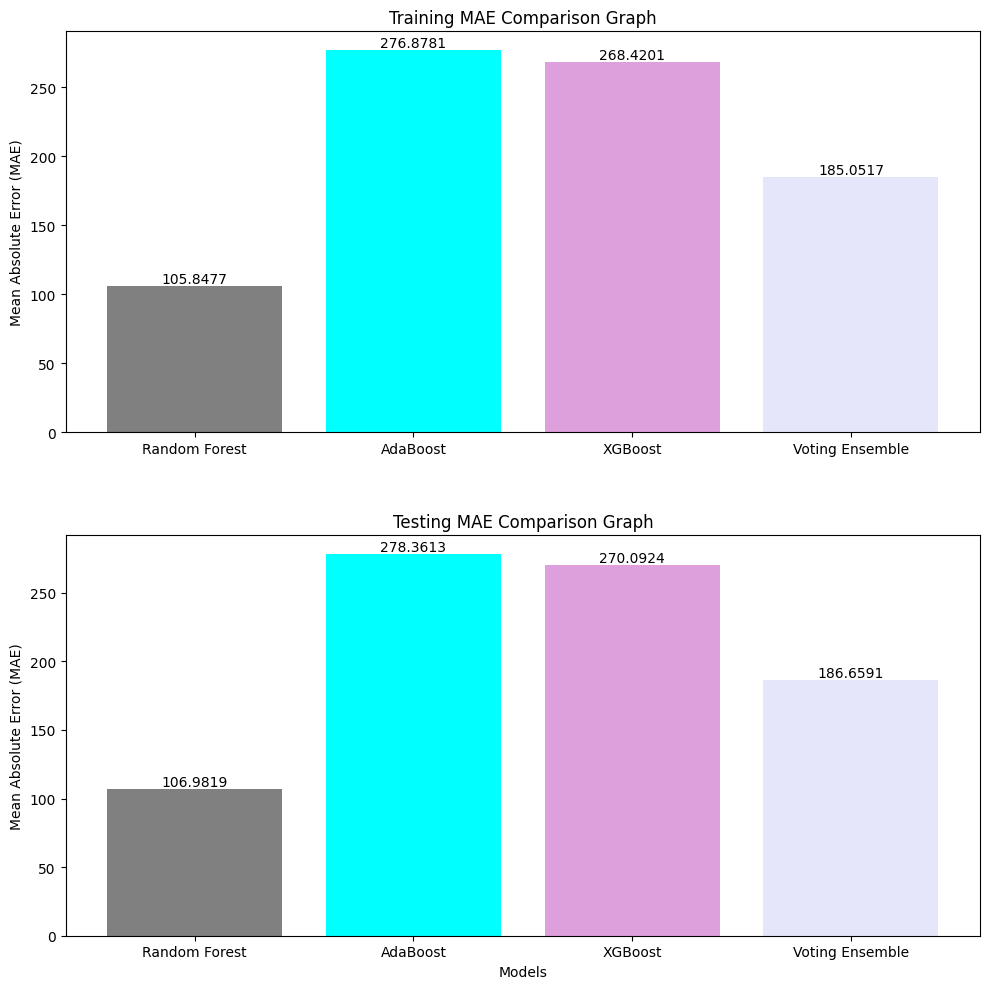

In [36]:
train_mae_values = [rf_train_mae, dt_train_mae, xgb_train_mae, ensemble_train_mae]
test_mae_values = [rf_mae, dt_mae, xgb_mae, ensemble_mae]
models = ['Random Forest', 'AdaBoost', 'XGBoost', 'Voting Ensemble']

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

#Now after that we are Plotting the bar graph for training MAE
bars1 = axs[0].bar(models, train_mae_values, color=['grey', 'aqua', 'plum','lavender'])
axs[0].set_title('Training MAE Comparison Graph')
axs[0].set_ylabel('Mean Absolute Error (MAE)')

#Now after that we are Adding the values on top of the bars
#Now after that we are Adding the values on top of the bars in the first subplot (axs[0])
for bar in bars1:
    yval = bar.get_height()

    #Now after that we are Displaying the rounded y-value on top of the bar at the center
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')


#Now after that we are Plotting the bar graph for testing MAE
bars2 = axs[1].bar(models, test_mae_values, color=['grey', 'aqua', 'plum','lavender'])
axs[1].set_title('\n\nTesting MAE Comparison Graph')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Mean Absolute Error (MAE)')

#Now after that we are Adding the values on top of the bars
for bar in bars2:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

#Now after that finally we are Display the graph
plt.tight_layout()
plt.show()


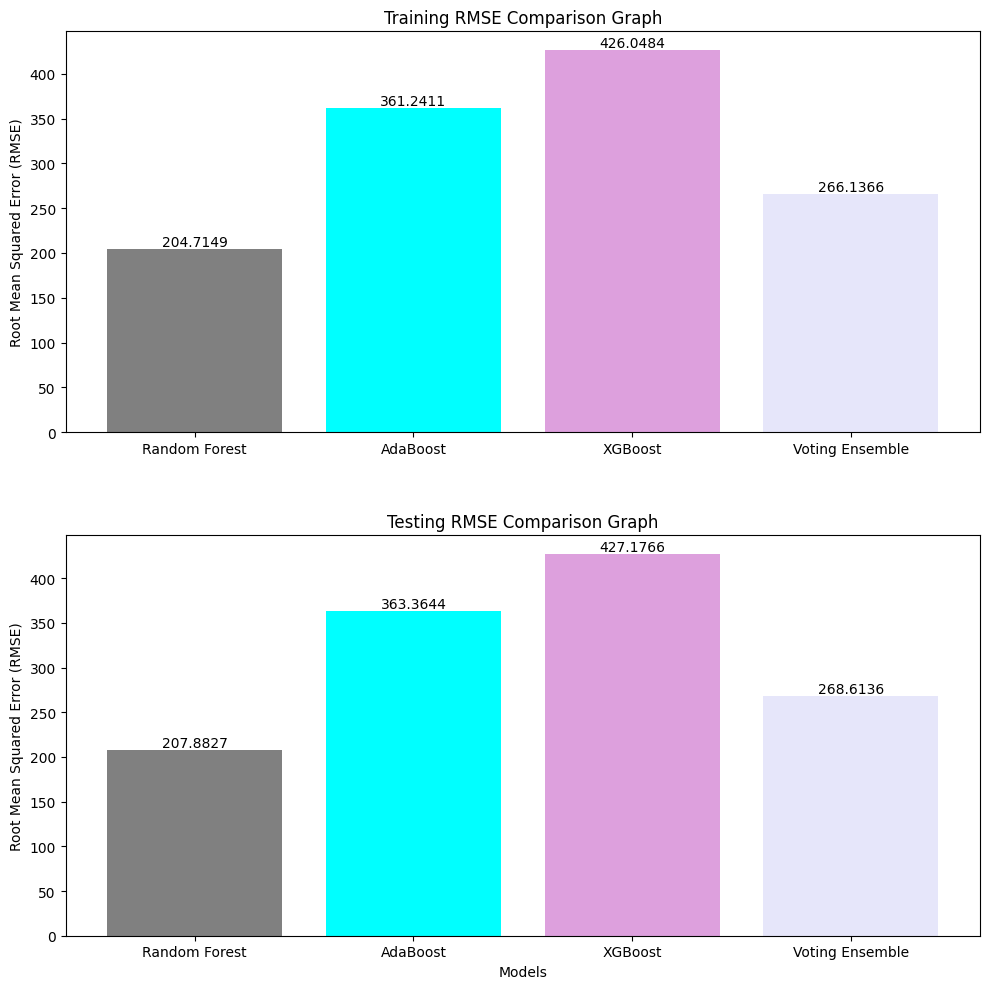

In [37]:
train_rmse_values = [rf_train_rmse, dt_train_rmse, xgb_train_rmse, ensemble_train_rmse]
test_rmse_values = [rf_rmse, dt_rmse, xgb_rmse, ensemble_rmse]
models = ['Random Forest', 'AdaBoost', 'XGBoost', 'Voting Ensemble']

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

#Now after that we are Plotting the bar graph for training RMSE
bars1 = axs[0].bar(models, train_rmse_values, color=['grey', 'aqua', 'plum','lavender'])
axs[0].set_title('Training RMSE Comparison Graph')
axs[0].set_ylabel('Root Mean Squared Error (RMSE)')

#Now after that we are Adding the values on top of the bars in the first subplot (axs[0])
for bar in bars1:
    yval = bar.get_height()

    #Now after that we are Displaying the rounded y-value on top of the bar at the center
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')


#Now after that we are Plotting the bar graph for testing RMSE
bars2 = axs[1].bar(models, test_rmse_values, color=['grey', 'aqua', 'plum','lavender'])
axs[1].set_title('\n\nTesting RMSE Comparison Graph')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Root Mean Squared Error (RMSE)')

#Now after that we are Adding the values on top of the bars
for bar in bars2:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

#Now after that finally we are Display the graph
plt.tight_layout()
plt.show()
